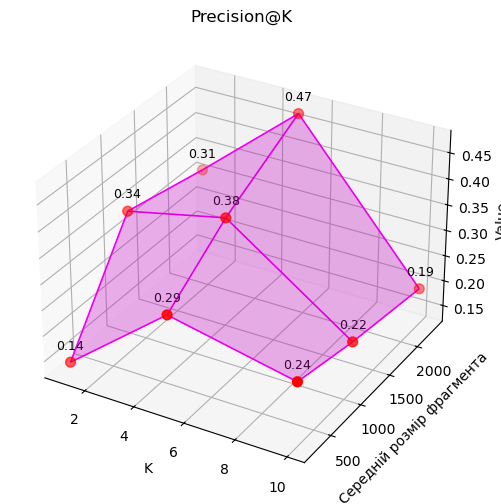

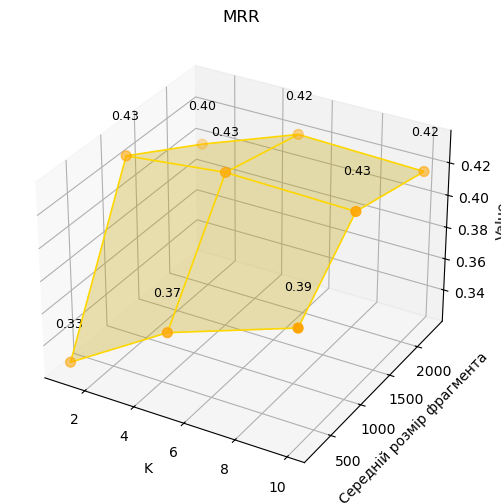

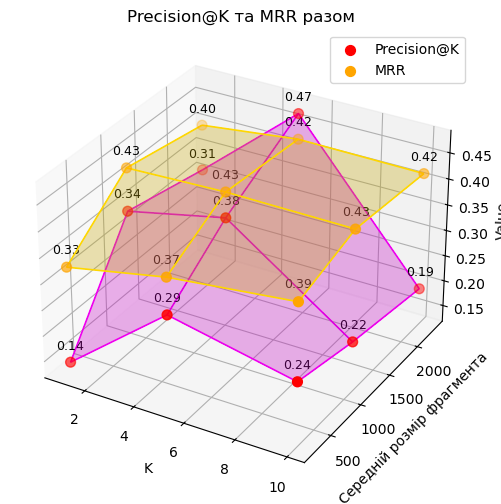

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Для відображення графіків в Jupyter Notebook
%matplotlib inline

# 1. Задаємо легенди
k_values = np.array([1, 5, 10])
size_values = np.array([227, 1129, 2312])

# 2. Створюємо сітку (meshgrid)
K, S = np.meshgrid(k_values, size_values)

# 3. Приклад двох матриць 3×3 з числами від 0 до 1
Z1 = np.array([
    [0.1420, 0.2943, 0.2437],
    [0.3422, 0.3833, 0.2164],
    [0.3077, 0.4687, 0.1909]
])  # це Precision@K

Z2 = np.array([
    [0.3273, 0.3653, 0.3921],
    [0.4256, 0.4321, 0.4301],
    [0.3970, 0.4192, 0.4167]
])  # це MRR

# 4. Функція для побудови дискретного полотна з підписами (чорні написи),
#    де є заповнення слабким відтінком + насичені лінії-ребра + точки + підписи
def plot_surface_with_wire_and_labels(ax, X, Y, Z,
                                      fill_color='magenta',  # легкий відтінок для заповнення
                                      edge_color='magenta',  # колір ребер
                                      scatter_color='red',   # колір точок
                                      label=None):
    # 4.1. Малюємо поверхню з непрозорістю (alpha) для легкого заповнення
    ax.plot_surface(
        X, Y, Z,
        color=fill_color,
        alpha=0.3,
        rcount=3, ccount=3,
        linewidth=0,
        antialiased=False
    )
    # 4.2. Додатково малюємо ті самі ребра більш насиченим кольором
    ax.plot_wireframe(
        X, Y, Z,
        rcount=3, ccount=3,
        color=edge_color,
        linewidth=1.2
    )
    # 4.3. Позначаємо вершини кольором scatter_color
    ax.scatter(X.flatten(), Y.flatten(), Z.flatten(), color=scatter_color, s=50, label=label)
    # 4.4. Додаємо текст біля кожної точки (чорний колір)
    for xi, yi, zi in zip(X.flatten(), Y.flatten(), Z.flatten()):
        ax.text(
            xi, yi, zi + 0.02,       # трохи піднімаємо текст над точкою по z
            f"{zi:.2f}",             # підпис з двома знаками після коми
            fontsize=9,
            horizontalalignment='center',
            verticalalignment='bottom',
            color='black'            # тепер завжди чорний
        )

# 5. Перший графік: Precision@K (рожевий)
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
plot_surface_with_wire_and_labels(
    ax1,
    K, S, Z1,
    fill_color='magenta',   # легкий рожевий відтінок
    edge_color='magenta',   # насичений рожевий для ребер
    scatter_color='red'
)
ax1.set_xlabel('K')  # велика літера
ax1.set_ylabel('Середній розмір фрагмента')
ax1.set_zlabel('Value')
ax1.set_title('Precision@K')

# 6. Другий графік: MRR (золотий)
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')
plot_surface_with_wire_and_labels(
    ax2,
    K, S, Z2,
    fill_color='gold',     # легкий золотий відтінок
    edge_color='gold',     # насичений золотий для ребер
    scatter_color='orange'
)
ax2.set_xlabel('K')
ax2.set_ylabel('Середній розмір фрагмента')
ax2.set_zlabel('Value')
ax2.set_title('MRR')

# 7. Третій графік: обидва полотна разом
fig3 = plt.figure(figsize=(8, 6))
ax3 = fig3.add_subplot(111, projection='3d')
# 7.1. Малюємо Precision@K у рожевому
plot_surface_with_wire_and_labels(
    ax3,
    K, S, Z1,
    fill_color='magenta',
    edge_color='magenta',
    scatter_color='red',
    label='Precision@K'
)
# 7.2. Малюємо MRR у золотому
plot_surface_with_wire_and_labels(
    ax3,
    K, S, Z2,
    fill_color='gold',
    edge_color='gold',
    scatter_color='orange',
    label='MRR'
)
ax3.set_xlabel('K')
ax3.set_ylabel('Середній розмір фрагмента')
ax3.set_zlabel('Value')
ax3.set_title('Precision@K та MRR разом')
ax3.legend()

plt.show()
